In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
from citipy import citipy
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates=list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=da14b0a5c04afb055a5edd8e30f5036c


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
    # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | marrakesh
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | denpasar
Processing Record 8 of Set 1 | aktau
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | saint anthony
Processing Record 11 of Set 1 | provideniya
Processing Record 12 of Set 1 | khatanga
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | san ramon
Processing Record 16 of Set 1 | falealupo
City not found. Skipping...
Processing Record 17 of Set 1 | sao filipe
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | novikovo
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | candido mendes
Processing Record 22 of Set 1 | illoqqortoormiut
City not found. Skippin

Processing Record 35 of Set 4 | karauzyak
City not found. Skipping...
Processing Record 36 of Set 4 | torres
Processing Record 37 of Set 4 | ormond beach
Processing Record 38 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 39 of Set 4 | jilib
Processing Record 40 of Set 4 | sioux lookout
Processing Record 41 of Set 4 | iqaluit
Processing Record 42 of Set 4 | kavaratti
Processing Record 43 of Set 4 | nelson bay
Processing Record 44 of Set 4 | laguna
Processing Record 45 of Set 4 | vila
Processing Record 46 of Set 4 | savannah bight
Processing Record 47 of Set 4 | nouadhibou
Processing Record 48 of Set 4 | sorland
Processing Record 49 of Set 4 | saint george
Processing Record 50 of Set 4 | namatanai
Processing Record 1 of Set 5 | correntina
Processing Record 2 of Set 5 | grindavik
Processing Record 3 of Set 5 | sept-iles
Processing Record 4 of Set 5 | new richmond
Processing Record 5 of Set 5 | mount gambier
Processing Record 6 of Set 5 | waverly
Processing Record 7

Processing Record 25 of Set 8 | pala
Processing Record 26 of Set 8 | houma
Processing Record 27 of Set 8 | teknaf
Processing Record 28 of Set 8 | saleaula
City not found. Skipping...
Processing Record 29 of Set 8 | ixtapa
Processing Record 30 of Set 8 | elizabeth city
Processing Record 31 of Set 8 | tramandai
Processing Record 32 of Set 8 | upernavik
Processing Record 33 of Set 8 | la ronge
Processing Record 34 of Set 8 | arkhara
Processing Record 35 of Set 8 | grand-santi
Processing Record 36 of Set 8 | corinto
Processing Record 37 of Set 8 | starosubkhangulovo
Processing Record 38 of Set 8 | mahibadhoo
Processing Record 39 of Set 8 | svetlogorsk
Processing Record 40 of Set 8 | jawar
Processing Record 41 of Set 8 | dongkan
Processing Record 42 of Set 8 | gao
Processing Record 43 of Set 8 | gat
Processing Record 44 of Set 8 | matane
Processing Record 45 of Set 8 | doha
Processing Record 46 of Set 8 | panaba
Processing Record 47 of Set 8 | haibowan
City not found. Skipping...
Processing

Processing Record 15 of Set 12 | ahuimanu
Processing Record 16 of Set 12 | verkh-usugli
Processing Record 17 of Set 12 | san rafael
Processing Record 18 of Set 12 | lahij
Processing Record 19 of Set 12 | bilma
Processing Record 20 of Set 12 | maragogi
Processing Record 21 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 22 of Set 12 | loiza
Processing Record 23 of Set 12 | neyshabur
Processing Record 24 of Set 12 | tromso
Processing Record 25 of Set 12 | robertsport
Processing Record 26 of Set 12 | sabha
Processing Record 27 of Set 12 | majene
Processing Record 28 of Set 12 | oyama
Processing Record 29 of Set 12 | lindi
Processing Record 30 of Set 12 | galchino
City not found. Skipping...
Processing Record 31 of Set 12 | anar darreh
City not found. Skipping...
Processing Record 32 of Set 12 | tiznit
Processing Record 33 of Set 12 | paradwip
City not found. Skipping...
Processing Record 34 of Set 12 | karpathos
Processing Record 35 of Set 12 | beringovskiy
Processing 

In [13]:
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Marrakesh,31.6315,-8.0083,78.87,34,0,11.50,MA,2023-03-31 20:52:48
1,Bluff,-46.6000,168.3333,55.80,91,100,6.49,NZ,2023-03-31 20:49:15
2,Qaanaaq,77.4840,-69.3632,-11.43,73,3,3.24,GL,2023-03-31 20:50:34
3,Mataura,-46.1927,168.8643,55.47,97,100,2.35,NZ,2023-03-31 20:50:38
4,Kapaa,22.0752,-159.3190,80.92,85,75,12.66,US,2023-03-31 20:49:18
5,Denpasar,-8.6500,115.2167,74.86,100,75,6.91,ID,2023-03-31 20:48:27
6,Aktau,43.6500,51.2000,45.18,58,100,24.45,KZ,2023-03-31 20:52:50
7,Punta Arenas,-53.1500,-70.9167,50.11,53,0,10.36,CL,2023-03-31 20:48:02
8,Saint Anthony,45.0205,-93.2180,36.66,90,100,18.41,US,2023-03-31 20:52:50
9,Provideniya,64.3833,-173.3000,15.76,81,32,5.39,RU,2023-03-31 20:52:50


In [15]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [17]:
new_column_order=['City','Country','Date','Lat', 'Lng', 'Max Temp','Humidity', 'Cloudiness', 'Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marrakesh,MA,2023-03-31 20:52:48,31.6315,-8.0083,78.87,34,0,11.50
1,Bluff,NZ,2023-03-31 20:49:15,-46.6000,168.3333,55.80,91,100,6.49
2,Qaanaaq,GL,2023-03-31 20:50:34,77.4840,-69.3632,-11.43,73,3,3.24
3,Mataura,NZ,2023-03-31 20:50:38,-46.1927,168.8643,55.47,97,100,2.35
4,Kapaa,US,2023-03-31 20:49:18,22.0752,-159.3190,80.92,85,75,12.66
...,...,...,...,...,...,...,...,...,...
530,Beringovskiy,RU,2023-03-31 21:06:34,63.0500,179.3167,19.47,86,38,7.47
531,Buritizeiro,BR,2023-03-31 21:06:34,-17.3511,-44.9622,81.50,27,2,4.65
532,Dubasari,MD,2023-03-31 21:06:34,47.2631,29.1608,41.79,90,46,2.17
533,Manzanillo,CU,2023-03-31 21:06:33,20.3433,-77.1167,89.94,40,43,0.94


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
# Get today's date in seconds.
today = time.time()
today

1680300227.7567325

In [27]:
time=time.strftime("%x")
time               

'03/31/23'

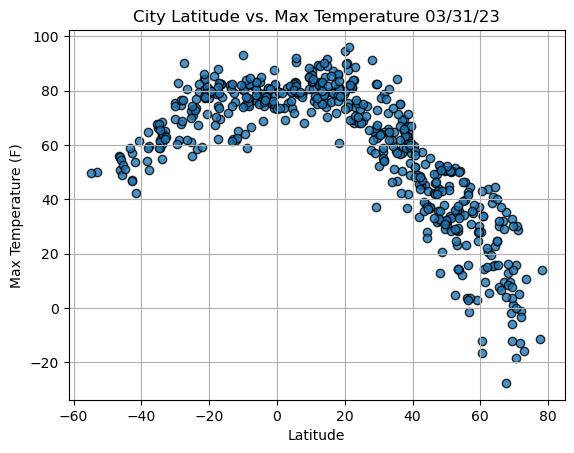

In [32]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

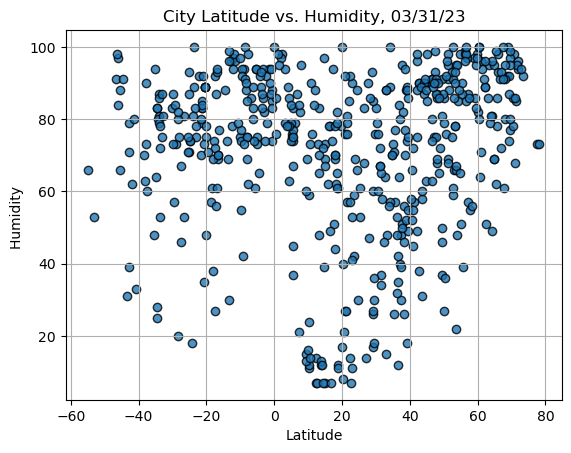

In [33]:
# Plot Latitude vs.humidity
plt.scatter(lats,
           humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity, "+ time)
plt.ylabel("Humidity ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

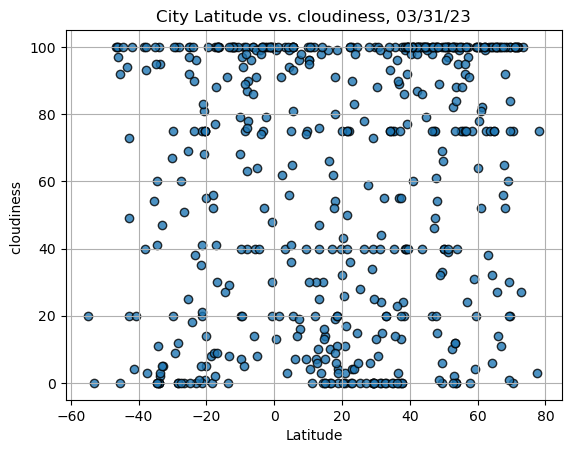

In [35]:
# Plot Latitude vs.  cloudiness
plt.scatter(lats,
         cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. cloudiness, "+ time)
plt.ylabel("cloudiness ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

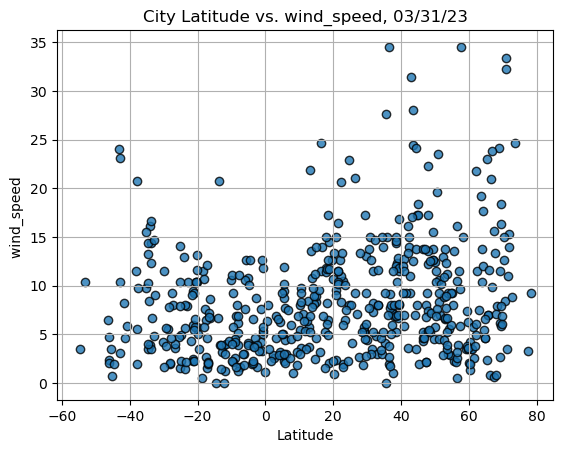

In [36]:
# Plot Latitude vs. Wind Speed
plt.scatter(lats,
         wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. wind_speed, "+ time)
plt.ylabel("wind_speed ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()